# Gradient Descent

Gradient descent is the most commonly used optimization method deployed in machine learning and deep learning algorithms. It’s used to train a machine learning model and is based on a convex function.

Through an iterative process, gradient descent refines a set of parameters through use of partial differential equations, or PDEs. It does this to minimize a given cost function to its local minimum. Gradient descent was invented by French mathematician Louis Augustin Cauchy in 1847.

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

[link text](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

## 3 Types of Gradient Descent
There are three primary types of gradient descent used in modern machine learning and deep learning algorithms. The main reason for these variations is computational efficiency. A data set may have millions or even billions of data points, and calculating the gradient over the entire data set can be computationally expensive.
Let’s review the different types here:
### Batch Gradient Descent
Batch Gradient Descent is the most straightforward type. It calculates the error for each example within the training set. After it evaluates all training examples, it updates the model parameters. This process is often referred to as a training epoch. Advantages of batch gradient descent are that it’s computationally efficient and produces a stable error gradient and a stable convergence. One disadvantage is that the stable error gradient can sometimes result in a state of convergence that isn’t the best the model can achieve. It also requires that the entire training set resides in memory and is available to the algorithm.
### Stochastic Gradient Descent
Stochastic Gradient Descent updates the parameters according to the gradient of the error with respect to a single training example. This is unlike Batch Gradient Descent, which updates the parameters after all training examples have been evaluated. This can make Stochastic Gradient Descent faster than Batch Gradient Descent depending on the problem. One advantage is that the frequent updates provide a detailed rate of improvement. A disadvantage is that the frequent updates are more computationally expensive than Batch Gradient Descent. The frequency of the updates also can result in noisy gradients, and may cause the error rate to fluctuate instead of slowly decrease.
### Mini Batch Gradient Descent
Mini Batch Gradient Descent is an often-preferred method since it uses a combination of Stochastic Gradient Descent and Batch Gradient Descent. It simply separates the training set into small batches and performs an update for each of these batches. It thus creates a balance between the efficiency of Batch Gradient Descent and the robustness of Stochastic Gradient Descent. Common numbers of examples per batch range between 30 and 500. But like for any other machine learning technique, there is no well-defined rule because the optimal number can vary for different problems. Mini Batch Gradient Descent is commonly used for deep learning problems.

In [ ]:
LINK = 'https://storage.googleapis.com/kagglesdsdata/datasets%2F10624%2F14867%2FSalary_Data.csv?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1598857796&Signature=S%2B8NLy124DJpxtQ6WbZuzv%2BDfKX0vGovmgNyJwJAkUTCoTQjiKTFn7jyUaB2t%2FD7loL2j%2BaFEkxN0rOEFJb8wR3qnnfV1Vy1QlY%2FTwQNLF04j089FkbjUaNZZ6bPTTlZ9CYy7oirATBcDojrCI5PH741lUjPbMPol9fNE9GFUWU%2Fz5u10LM0zsPS8k1uKx%2BvHX2eLyR9h2X%2BKvS8BYDOvb6q2hKwja0opk4QRFjM%2BcnReDWkR%2B9y%2FhMiH6xcmeuP7nkxY%2BzkALVj0dHszdCYzjFaZlMhUEIYiUJ7zLzKQxE%2FtqAnhzjybqTjSaADA85I70Y0pVI%2BUSzIIu8cu01Vtg%3D%3D'
OUT_FILE = 'sample.csv'

!curl LINK --output f'/content/{OUT_FILE}' --silent

In [ ]:
!ls -lrtah

total 16K
drwxr-xr-x 1 root root 4.0K Aug 24 16:35 .
drwxr-xr-x 1 root root 4.0K Aug 24 16:35 sample_data
drwxr-xr-x 1 root root 4.0K Aug 26 16:14 .config
drwxr-xr-x 1 root root 4.0K Aug 28 07:06 ..


In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px

In [ ]:
from sklearn.datasets import make_regression

## Create Dataset

In [ ]:
# generate regression dataset
X, y = make_regression(n_samples=500, n_features=1, noise=15, bias=3, random_state=25)

In [ ]:
X = X.reshape(-1)
X[:20], y[:20]


(array([-0.06428606, -0.28670836,  0.56016947,  0.2884644 , -0.46534301,
         0.03229391,  2.49684695, -0.66918729, -1.04601802,  0.19470454,
        -0.23696333,  1.92565548,  0.97062793,  0.93655537,  0.08538349,
         1.3667556 ,  0.2769354 ,  1.17826259,  0.47486735,  0.45644827]),
 array([-12.73080704, -16.39595433,  17.87860294,  31.10382664,
        -29.21535947, -13.36466253, 103.42406465, -30.57762572,
        -19.6699191 ,  -2.06483171,   0.16383823, 102.05334584,
         49.9325081 ,  40.95423642,  33.22695429,  24.2284136 ,
         19.78177523,  62.22646542,  11.7191016 ,  40.74248799]))

## Plot

In [ ]:
px.scatter(x=X, y=y)

In [ ]:
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



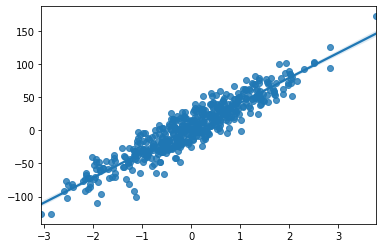

In [ ]:
sb.regplot(x=X, y=y)

In [ ]:
#y = mx + b

In [ ]:
#error = (y_hat - y) ^ 2

## Gradient Descent Algorithm

In [ ]:
def gradient_descent(X, y, m, b, lr):
  n = len(X)
  m_deriv = 0
  b_deriv = 0
  y_preds = []
  total_error = 0
  
  for xi, yi in zip(X, y):
    y_hat = m * xi + b
    error = np.power((y_hat - yi), 2)

    y_preds.append(y_hat)
    total_error += error
    mse = total_error / n

    # Calculate partial derivatives
    # -2x(y - (mx + b))
    m_deriv += -2 * xi * (yi - y_hat)

    # -2(y - (mx + b))
    b_deriv += -2 * (yi - y_hat)
  
  m -= (1 / n) * m_deriv * lr
  b -= (1 / n) * b_deriv * lr

  return m, b, y_preds, total_error, mse

## Iterative Learning

### Learning Rate is 1

In [ ]:
# Iteration1
m = np.random.randint(10)
b = np.random.randint(5)
lr = 1
total_error = 0
mse = 0
mse_list = []
print('Slope m:{}; Bias b:{}; Total Error:{}; MSE:{}'.format(m, b, total_error, mse))
fig = px.scatter(x=X, y=y)

for iter in range(20):
  m, b, y_preds, total_error, mse = gradient_descent(X, y, m, b, lr)
  print("Iteration#%3d -> Slope m:%10.5f; Bias b:%8.5f; Total Error:%15.5f, MSE:%13.5f" %(iter, m, b, total_error, mse))
  mse_list.append(mse)
  fig.add_scatter(x=X, y=y_preds, mode='lines')

fig.show()

Slope m:7; Bias b:0; Total Error:0; MSE:0
Iteration#  0 -> Slope m:  74.81695; Bias b: 7.09224; Total Error:651749.41813, MSE:1303.49884
Iteration#  1 -> Slope m:  -7.38599; Bias b: 0.46297; Total Error:894832.05989, MSE:1789.66412
Iteration#  2 -> Slope m:  92.26807; Bias b: 6.53106; Total Error:1252535.35172, MSE:2505.07070
Iteration#  3 -> Slope m: -28.55530; Bias b: 1.14328; Total Error:1778905.27328, MSE:3557.81055
Iteration#  4 -> Slope m: 117.94778; Bias b: 5.70623; Total Error:2553471.58890, MSE:5106.94318
Iteration#  5 -> Slope m: -59.70641; Bias b: 2.14342; Total Error:3693263.97326, MSE:7386.52795
Iteration#  6 -> Slope m: 155.73603; Bias b: 4.49343; Total Error:5370493.98602, MSE:10740.98797
Iteration#  7 -> Slope m:-105.54593; Bias b: 3.61419; Total Error:7838574.45910, MSE:15677.14892
Iteration#  8 -> Slope m: 211.34224; Bias b: 2.70972; Total Error:11470407.55721, MSE:22940.81511
Iteration#  9 -> Slope m:-172.99975; Bias b: 5.77751; Total Error:16814726.44191, MSE:33629.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=mse_list, mode='markers'))
fig.add_trace(go.Line(y=mse_list))
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Learning Rate is 0.5

In [ ]:
# Iteration1
m = np.random.randint(10)
b = np.random.randint(5)
lr = 0.5
total_error = 0
mse = 0
mse_list = []
print('Slope m:{}; Bias b:{}; Total Error:{}; MSE:{}'.format(m, b, total_error, mse))
fig = px.scatter(x=X, y=y)

for iter in range(20):
  m, b, y_preds, total_error, mse = gradient_descent(X, y, m, b, lr)
  print("Iteration#%3d -> Slope m:%10.5f; Bias b:%8.5f; Total Error:%10.5f, MSE:%10.5f" %(iter, m, b, total_error, mse))
  mse_list.append(mse)
  fig.add_scatter(x=X, y=y_preds, mode='lines')

fig.show()

Slope m:7; Bias b:1; Total Error:0; MSE:0
Iteration#  0 -> Slope m:  40.91189; Bias b: 3.54612; Total Error:648703.29886, MSE:1297.40660
Iteration#  1 -> Slope m:  37.31161; Bias b: 3.66187; Total Error:131352.60567, MSE: 262.70521
Iteration#  2 -> Slope m:  37.69515; Bias b: 3.64958; Total Error:125556.05862, MSE: 251.11212
Iteration#  3 -> Slope m:  37.65430; Bias b: 3.65089; Total Error:125490.27420, MSE: 250.98055
Iteration#  4 -> Slope m:  37.65865; Bias b: 3.65075; Total Error:125489.52762, MSE: 250.97906
Iteration#  5 -> Slope m:  37.65818; Bias b: 3.65077; Total Error:125489.51914, MSE: 250.97904
Iteration#  6 -> Slope m:  37.65823; Bias b: 3.65077; Total Error:125489.51905, MSE: 250.97904
Iteration#  7 -> Slope m:  37.65823; Bias b: 3.65077; Total Error:125489.51905, MSE: 250.97904
Iteration#  8 -> Slope m:  37.65823; Bias b: 3.65077; Total Error:125489.51905, MSE: 250.97904
Iteration#  9 -> Slope m:  37.65823; Bias b: 3.65077; Total Error:125489.51905, MSE: 250.97904
Iteratio

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=mse_list, mode='markers'))
fig.add_trace(go.Line(y=mse_list))
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Learning Rate is 0.01

In [ ]:
# Iteration1
m = np.random.randint(10)
b = np.random.randint(5)
lr = 0.01
total_error = 0
mse = 0
mse_list = []
print('Slope m:{}; Bias b:{}; Total Error:{}; MSE:{}'.format(m, b, total_error, mse))
fig = px.scatter(x=X, y=y)

for iter in range(200):
  m, b, y_preds, total_error, mse = gradient_descent(X, y, m, b, lr)
  print("Iteration#%3d -> Slope m:%10.5f; Bias b:%8.5f; Total Error:%10.5f, MSE:%10.5f" %(iter, m, b, total_error, mse))
  mse_list.append(mse)
  fig.add_scatter(x=X, y=y_preds, mode='lines')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=mse_list, mode='markers'))
fig.add_trace(go.Line(y=mse_list))
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Learning Rate is 0.1

In [ ]:
# Iteration1
m = np.random.randint(10)
b = np.random.randint(5)
lr = 0.1
total_error = 0
mse = 0
mse_list = []
print('Slope m:{}; Bias b:{}; Total Error:{}; MSE:{}'.format(m, b, total_error, mse))
fig = px.scatter(x=X, y=y)

for iter in range(20):
  m, b, y_preds, total_error, mse = gradient_descent(X, y, m, b, lr)
  print("Iteration#%3d -> Slope m:%10.5f; Bias b:%8.5f; Total Error:%10.5f, MSE:%10.5f" %(iter, m, b, total_error, mse))
  mse_list.append(mse)
  fig.add_scatter(x=X, y=y_preds, mode='lines')

fig.show()

Slope m:6; Bias b:1; Total Error:0; MSE:0
Iteration#  0 -> Slope m:  13.00366; Bias b: 1.50854; Total Error:683168.39627, MSE:1366.33679
Iteration#  1 -> Slope m:  18.45787; Bias b: 1.92016; Total Error:463871.79372, MSE: 927.74359
Iteration#  2 -> Slope m:  22.70543; Bias b: 2.25317; Total Error:330816.92033, MSE: 661.63384
Iteration#  3 -> Slope m:  26.01329; Bias b: 2.52248; Total Error:250085.19470, MSE: 500.17039
Iteration#  4 -> Slope m:  28.58937; Bias b: 2.74019; Total Error:201099.07481, MSE: 402.19815
Iteration#  5 -> Slope m:  30.59554; Bias b: 2.91611; Total Error:171374.33696, MSE: 342.74867
Iteration#  6 -> Slope m:  32.15790; Bias b: 3.05822; Total Error:153336.68153, MSE: 306.67336
Iteration#  7 -> Slope m:  33.37463; Bias b: 3.17298; Total Error:142390.56367, MSE: 284.78113
Iteration#  8 -> Slope m:  34.32220; Bias b: 3.26561; Total Error:135747.64242, MSE: 271.49528
Iteration#  9 -> Slope m:  35.06015; Bias b: 3.34036; Total Error:131716.03668, MSE: 263.43207
Iteratio

## Loss Function

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=mse_list, mode='markers'))
fig.add_trace(go.Line(y=mse_list))
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Best Fit Line

In [ ]:
# Best fit
fig = px.scatter(x=X, y=y)
fig.add_scatter(x=X, y=y_preds)